## Credit Score Classification

Final project for COMP 562-001 by Jordan Bean (PID: 730151647).

In [16]:
import pandas as pd
import numpy as np

# Read data into a dataframe
data = pd.read_csv('data/train.csv')

# Display top of dataframe
data.head(10)

/Users/Jordan/.julia/conda/3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [17]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### (1) Data Cleaning

In [18]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# Iterate through the columns, remove unnecessary characters (if applicable), and convert to appropriate data type
for col in list(data.columns):
    if ('Month' == col or 'Name' in col or 'SSN' in col or 'Occupation' in col or 'Credit_Mix' in col or
        'Credit_History_Age' in col or 'ID' in col or 'Type_of_Loan' in col or 
        'Payment_of_Min_Amount' in col or 'Payment_Behaviour' in col):
        data[col] = data[col].astype('string')
        if ('Occupation' in col):
            data[col] = data[col].str.replace("_______", "NaN")
    elif ('Age' in col or 'Num_of_Loan' in col):
        data[col] = data[col].astype('string')
        data[col] = data[col].str.replace("_", "")
        data[col] = data[col].str.replace("-", "")
        data[col] = data[col].astype('int')
        # data[col].where(data['Age'] > 99, np.nan, inplace=True)
    elif ('Annual_Income' in col or 'Outstanding_Debt' in col or 
        'Monthly_Balance' in col or 'Amount_invested_monthly' in col):
        data[col] = data[col].str.replace("_", "")
        data[col] = data[col].astype('float')
    elif ('Credit_Score' in col):
            for record in col:
                data[col] = data[col].replace("Good", 2)
                data[col] = data[col].replace("Standard", 1)
                data[col] = data[col].replace("Poor", 0)

# Could not convert Num_of_Delayed_Payment or Changed_Credit_Limit

In [19]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  string 
 1   Customer_ID               100000 non-null  string 
 2   Month                     100000 non-null  string 
 3   Name                      90015 non-null   string 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  string 
 6   Occupation                100000 non-null  string 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   st

In [20]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [21]:
missing_values_table(data)

Your selected dataframe has 28 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
Monthly_Inhand_Salary,15002,15.0
Type_of_Loan,11408,11.4
Name,9985,10.0
Credit_History_Age,9030,9.0
Num_of_Delayed_Payment,7002,7.0
Amount_invested_monthly,4479,4.5
Monthly_Balance,2868,2.9
Num_Credit_Inquiries,1965,2.0


In [22]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 28 columns.
There are 8 columns that have missing values.
We will remove 0 columns.


### (2) Exploratory Analysis

Text(0.5, 1.0, 'Credit Score Distribution')

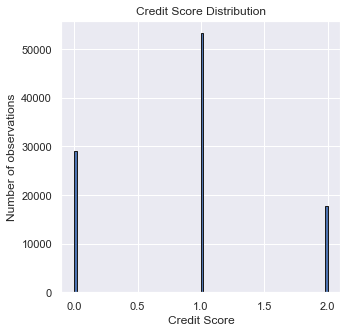

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the Credit Score categories
plt.figure(figsize=(5,5))
plt.hist(data['Credit_Score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Credit Score'); plt.ylabel('Number of observations')
plt.title('Credit Score Distribution')

<AxesSubplot: xlabel='Credit_Score', ylabel='count'>

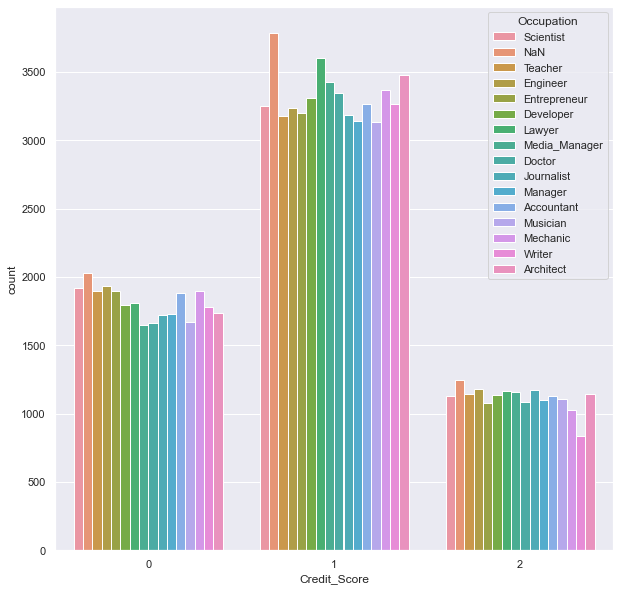

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x='Credit_Score', hue='Occupation', data=data)

<AxesSubplot: title={'center': 'Credit_Utilization_Ratio'}, xlabel='Credit_Score'>

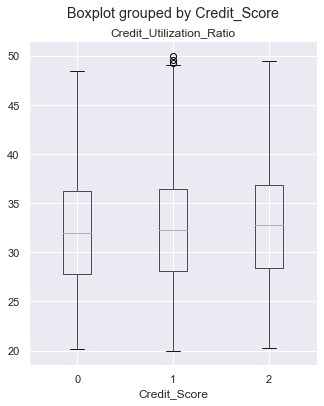

In [35]:
data.boxplot(column='Credit_Utilization_Ratio', by='Credit_Score', figsize=(5,6))

<AxesSubplot: title={'center': 'Outstanding_Debt'}, xlabel='Credit_Score'>

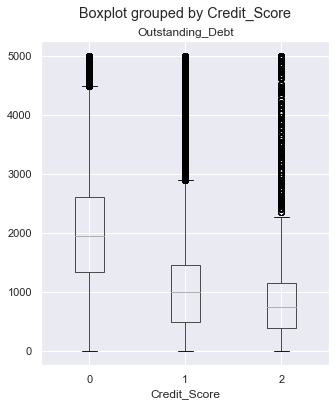

In [29]:
data.boxplot(column='Outstanding_Debt', by='Credit_Score', figsize=(5,6))

<AxesSubplot: title={'center': 'Monthly_Inhand_Salary'}, xlabel='Credit_Score'>

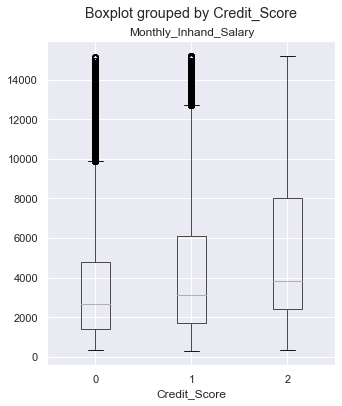

In [30]:
data.boxplot(column='Monthly_Inhand_Salary', by='Credit_Score', figsize=(5,6))

<AxesSubplot: title={'center': 'Delay_from_due_date'}, xlabel='Credit_Score'>

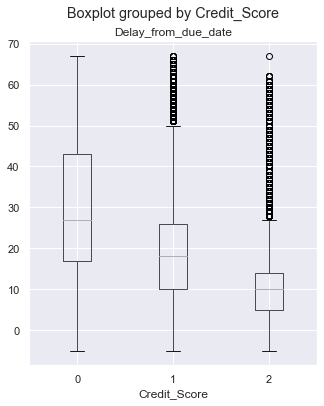

In [38]:
data.boxplot(column='Delay_from_due_date', by='Credit_Score', figsize=(5,6))

In [32]:
# Find all correlations and sort 
correlations_data = data.corr()['Credit_Score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Delay_from_due_date        -0.431591
Outstanding_Debt           -0.386525
Num_Credit_Inquiries       -0.011235
Num_Bank_Accounts          -0.010491
Num_Credit_Card            -0.007624
Num_of_Loan                -0.006802
Interest_Rate              -0.002591
Monthly_Balance            -0.001610
Total_EMI_per_month         0.004382
Age                         0.004755
Annual_Income               0.008015
Amount_invested_monthly     0.011631
Credit_Utilization_Ratio    0.045793
Monthly_Inhand_Salary       0.209318
Credit_Score                1.000000
Name: Credit_Score, dtype: float64 

Delay_from_due_date        -0.431591
Outstanding_Debt           -0.386525
Num_Credit_Inquiries       -0.011235
Num_Bank_Accounts          -0.010491
Num_Credit_Card            -0.007624
Num_of_Loan                -0.006802
Interest_Rate              -0.002591
Monthly_Balance            -0.001610
Total_EMI_per_month         0.004382
Age                         0.004755
Annual_Income               0.008015
A

### (3) 